In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [2]:
cam='datasets/CATS_DOGS/'

In [3]:
cat4=cv2.imread(cam+'train/CAT/4.jpg')

In [4]:
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

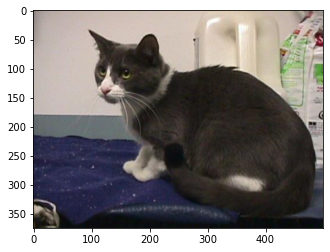

In [5]:
plt.imshow(cat4)

In [6]:
dog=cv2.imread(cam+'train/DOG/1.jpg')

In [7]:
dog=cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)

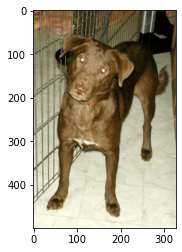

In [13]:
plt.imshow(dog)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest'
                              )

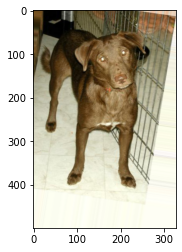

In [15]:
plt.imshow(image_gen.random_transform(dog))

In [17]:
dataset = image_gen.flow_from_directory(cam+'train')

Found 18743 images belonging to 2 classes.


In [25]:
from keras.models import Sequential
from keras.layers import Activation,Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [29]:
input_shape=(150,150,3)

In [27]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)            

In [30]:
BS=16

train_image_gen = image_gen.flow_from_directory(cam+'train',
                                               target_size=input_shape[:2],
                                               batch_size=BS,
                                               class_mode='binary')

Found 18743 images belonging to 2 classes.


In [31]:
test_image_gen = image_gen.flow_from_directory(cam+'test',
                                               target_size=input_shape[:2],
                                               batch_size=BS,
                                               class_mode='binary')

Found 6251 images belonging to 2 classes.


In [32]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [35]:
results = model.fit_generator(train_image_gen,epochs=1,steps_per_epoch=150,
                             validation_data=test_image_gen,validation_steps=12)

150/150 [==============================] - 29s 194ms/step - loss: 0.6905 - accuracy: 0.5333 - val_loss: 0.6835 - val_accuracy: 0.5677
